<font size="6"><b>DATA VISUALIZATION</b></font>

In [ ]:
library(data.table)
library(tidyverse)
library(plotly)
library(nycflights13)

In [ ]:
pw1 <- getOption("repr.plot.width")
pw1

In [ ]:
ph1 <- getOption("repr.plot.width")
ph1

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=30) # for limiting the number of top and bottom rows of tables printed 

![xkcd](../imagesba/movie_narrative_charts_large.png)

(https://xkcd.com/657)

**Note:** For accessing RStudio for modifying Rmarkdown files or Shiny apps, please:

- Select file browser from the side bar through the symbol: 

- Open the Launcher by hitting the button: 

- Hit "RStudio" button from the Launcher:

  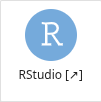

- Navigate to 04_data_communication/02_markdown/html_version.Rmd for Rmarkdown example or 04_data_communication/03_shiny/app.R for Shiny app example

For running interactive Shiny applications as webpages:

- Hit "Shiny" button from the Launcher:

  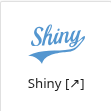

- Navigate to 04_data_communication/03_shiny

In this session, we will visualize data using ggplot2 and plotly packages

We will use the same data from nycflights13 package

# Datasets

Let's remember the flights table from nycflights13 package:

In [ ]:
head(flights)

# ggplot2

Let's first create a copy of the flights table and make it a data.table:

In [ ]:
flights2 <- copy(flights)

In [ ]:
setDT(flights2)

Add a date column:

In [ ]:
flights2[, date1 := as.Date(time_hour)] # convert time hour to date

And create a summarized version of the table so that for each date and origin we have average departure delay, arrival delay and distance: 

In [ ]:
flights2 <- flights2 %>%
group_by(date1, origin) %>%
summarise_at(c("dep_delay", "arr_delay", "distance"), mean, na.rm = T)

In [ ]:
flights2 %>% head

Let's add some additional features:

- Weekdays with three letter labels using wday function from lubridate package that deals with datetime objects
- Months as values from 1 to 12 using month function from lubridate package
- 3-month quarter such that 1:3 to Q1, 4:6 to Q2, 7:9 to Q3, 10:12 to Q4

In [ ]:
flights2 <- flights2 %>%
mutate(weekday = lubridate::wday(date1, label = T)) %>% # we create the weekday
mutate(mnt = month(date1)) %>% # we extract the months as 1 to 12
# we convert the months to quarters: 1:3 to Q1, 4:6 to Q2, 7:9 to Q3, 10:12 to Q4s
mutate(quartx = paste("Q", (mnt - 1) %/% 3 + 1, sep = ""))

In [ ]:
flights2

## Line chart

### 2 dimensions: x and y

Now first let's create a line chart across dates, where y axis shows the average departure delay for each day

The dimensions are passed by `aes()` function:

In [ ]:
flights2 %>%
ggplot(aes(x = date1, y = dep_delay)) +
geom_line()

### 3 dimensions: x, y, and colored lines

Now let's differentiate the lines by color according to the origin airport, so we add a third dimension:

In [ ]:
flights2 %>%
ggplot(aes(x = date1, y = dep_delay, color = origin)) +
geom_line()

## Scatter plot

### 2 dimensions: x and y

Let's try a scatter plot across average daily departure and array delays:

In [ ]:
flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay)) +
geom_point()

### 3 dimensions: x, y and bubbles

Let's add a third dimension by changing the size of points according to the flight distance, so we have a bubble chart:

In [ ]:
flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay, size = distance)) +
geom_point(alpha = 0.5)

### 4 dimensions: x, y, bubbles and color

And let's add a fourth dimension by changing the color of points according to the origin airport:

In [ ]:
flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay, size = distance, color = origin)) +
geom_point(alpha = 0.5)

### 5 dimensions: x, y, bubbles, color and facets

And we can create multiple charts for each weekday using `facet_wrap()` function, now we have five dimensions.

We are creating the weekdays columns with `wday` function from lubridate package that deals with datetime objects and mutate: 

In [ ]:
flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay, size = distance, color = origin)) +
geom_point(alpha = 0.5) +
facet_wrap(. ~ weekday)

### 6 dimensions: x, y, bubbles, color, and 2D facets

And let's create a separate chart for each combinations of a weekday and a quarter (three months) using `facet_grid()` function, we have six dimensions!:

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)

In [ ]:
flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay, size = distance, color = origin)) +
geom_point(alpha = 0.5) +
facet_grid(weekday ~ quartx)

# plotly

So far we had static charts with no interactions, just pictures.

Now let's do something fancy very easily:

- First create a ggplot chart and assign to a named object
- Call that object with `ggplotly()` function from plotly package

In [ ]:
pl1 <- flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay, size = distance, color = origin)) +
geom_point(alpha = 0.5)

In [ ]:
ggplotly(pl1)

It is the same chart, but we can hover over points and see the data in pop-up tooltip, we can switch colors on and off, zoom, pan, etc.

Faceted charts can also be converted to plotly:

In [ ]:
pl2 <- flights2 %>%
ggplot(aes(x = dep_delay, y = arr_delay, size = distance, color = origin)) +
geom_point(alpha = 0.5) +
facet_wrap(. ~ weekday)

In [ ]:
ggplotly(pl2)

# APPENDIX: Optional methods

## Animated plotly charts

We can also create animated charts using plotly's own syntax and passing a feature for the `frame` dimensions:

In [ ]:
flights2 %>%
plot_ly(x = ~dep_delay, y = ~arr_delay) %>%
add_trace(frame = ~mnt, type = "scatter") %>%
animation_opts(
    frame = 200, redraw = T, easing = "linear", mode = "next"
)

## Interactive rotatable 3D charts

We can even create interactive rotatable 3D charts easily in plotly:

In [ ]:
if (T)
{    
    plot_ly() %>% 
          add_trace(data = flights2,  x = ~dep_delay, y = ~arr_delay, z = ~distance, type="mesh3d") %>%
            layout(autosize = F, width = 800, height = 800,
                  scene = list(xaxis = list(title = "dep_delay"),
                  yaxis = list(title = "arr_delay"),
                  zaxis = list(title = "distance")))
}